<a href="https://colab.research.google.com/github/sanskriti-iyer/sentimental-analysis/blob/main/TCSIon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Tweets.csv')[0:4000]

In [ ]:
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
text = dataset['text'].values
text=[word_tokenize(doc) for doc in text]
sentiment=dataset['airline_sentiment'].values

In [ ]:
print(text)

[['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.'], ['@', 'VirginAmerica', 'plus', 'you', "'ve", 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.'], ['@', 'VirginAmerica', 'I', 'did', "n't", 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!'], ['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse'], ['@', 'VirginAmerica', 'and', 'it', "'s", 'a', 'really', 'big', 'bad', 'thing', 'about', 'it'], ['@', 'VirginAmerica', 'seriously', 'would', 'pay', '$', '30', 'a', 'flight', 'for', 'seats', 'that', 'did', "n't", 'have', 'this', 'playing', '.', 'it', "'s", 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA'], ['@', 'VirginAmerica', 'yes', ',', 'nearly', 'every', 'time', 'I', 'fly', 'VX', 'this', '“', 'ear', 'worm', '”', 'won', '’', 't', 'go', 'away', ':', ')'], ['@',

In [ ]:
print(sentiment)

['neutral' 'positive' 'neutral' ... 'negative' 'positive' 'negative']


In [ ]:
#print(all_documents_modified[0])

documents = [(text[i] , sentiment[i]) for i in range(4000)]

In [ ]:
documents[0]

(['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.'], 'neutral')

**Data Preproccessing and Cleaning**

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk.corpus import wordnet
def get_simple_pos(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)
stops, string.punctuation

({'!',
  '"',
  '#',
  '$',
  '%',
  '&',
  "'",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '.',
  '/',
  ':',
  ';',
  '<',
  '=',
  '>',
  '?',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',


In [ ]:
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [ ]:
document = [(clean_review(doc), category) for doc, category in documents]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
categories = [category for document, category in documents]

In [ ]:
text_documents = [" ".join(document) for document, category in documents]

Splitting Dataset into Test and Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(text_documents, categories)

I'll be doing Vectorisation to get words occuring frequently

In [ ]:
count_vect=TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)
x_train_features=count_vect.fit_transform(x_train)
x_test_features=count_vect.transform(x_test)

Testing the score accuracy for different models

In [ ]:
#SVM Classifer

clf = SVC()
clf.fit(x_train_features,y_train)
ypred1 = clf.predict(x_test_features)
clf.score(x_test_features, y_test)

0.734

In [ ]:
#RANDOM FOREST CLASSIFIER

clf1=RandomForestClassifier(n_estimators=2000, n_jobs=-1)
clf1.fit(x_train_features, y_train)
ypred2 = clf1.predict(x_test_features)
clf1.score(x_test_features,y_test)

0.726

In [ ]:
#Naive Bayes' Classifier
clf2=MultinomialNB()
clf2.fit(x_train_features, y_train)
ypred3 = clf2.predict(x_test_features)

clf2.score(x_test_features, y_test)

0.669

Using Naive Bayes' approach (from scratch)

In [ ]:
le = preprocessing.LabelEncoder()
new_y_train = le.fit_transform(y_train)
new_y_test = le.fit_transform(y_test)

In [ ]:
features = count_vect.get_feature_names()[20:2000]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(features)

['2014', '2015', '20min', '21', '23', '24', '25', '27', '2hrs', '2nd', '30', '300', '30min', '32', '35', '36', '3am', '3pm', '3rd', '40', '400', '45', '50', '56', '59', '5hr', '5hrs', '60', '600', '6232', '683', '6am', '6hrs', '70', '72rmpkogwu', '737', '75', '757', '777', '787', '7am', '800', '90', 'aa', 'able', 'about', 'above', 'absolute', 'absurd', 'ac', 'acceptable', 'access', 'account', 'acct', 'accurate', 'across', 'act', 'active', 'actual', 'actually', 'add', 'added', 'adding', 'additional', 'address', 'adopting', 'advance', 'advertise', 'advise', 'advisory', 'affected', 'after', 'afternoon', 'again', 'age', 'agent', 'agents', 'ago', 'ahead', 'air', 'aircanada', 'aircraft', 'airfare', 'airline', 'airlinegeeks', 'airlines', 'airplane', 'airport', 'airports', 'all', 'alliance', 'allow', 'allowed', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'amazing', 'america', 'american', 'americanair', 'amount', 'amp', 'an', 'and', 'andrews', 'angry', 'announceme

In [ ]:
def data_modifier(x_data, features):
    modified_data=np.zeros((len(x_data), len(features)))
    for i in range(len(x_data)):
        current_doc=x_data[i]
        d=dict()
        for word in current_doc:
            if word in d.keys():
                d[word]+=1
            else:
                d[word]=1
        for j in range(len(features)):
            if features[j] in d.keys():
                modified_data[i][j]=d[features[j]]
            else:
                continue
    return modified_data

In [ ]:
x_train_new=[word_tokenize(doc) for doc in x_train]
x_test_new=[word_tokenize(doc) for doc in x_test]

In [ ]:
x_train_modified = data_modifier(x_train_new , features)
x_test_modified = data_modifier(x_test_new , features)

In [ ]:
def fit(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        count[i]=dict()
        count[i]['total']=0
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            count[i]['total']+=count[i][features[j]]
    return count

In [ ]:
def probability(dictionary, x, current_class):
    probas_for_each_word=[]

    for i in range(len(x)):
        if x[i]!=0:

            numerator=dictionary[current_class][features[i]]
            denominator=dictionary[current_class]['total']
            proba=np.log((numerator+1)/(denominator+len(x)))
            probas_for_each_word.append(proba)
    return sum(probas_for_each_word)

In [ ]:
def predict_single(dic, x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        p_current_class = probability(dic, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

In [ ]:
def predict(x_test, dic):
    y_pred=[]
    for doc in x_test:
        y_pred.append(predict_single(dic, doc))
    return y_pred

In [ ]:
dictionary = fit(x_train_modified, new_y_train)

In [ ]:
y_predicted=predict(x_test_modified, dictionary)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=new_y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       623
           1       0.67      0.06      0.11       192
           2       0.94      0.08      0.15       185

    accuracy                           0.65      1000
   macro avg       0.75      0.38      0.35      1000
weighted avg       0.70      0.65      0.54      1000



In [ ]:
#This shows that the classifier works as the difference between accuracy is very less

Combining both classifiers

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('MNB', MultinomialNB()), ('SVC',SVC(probability=True))], voting='soft').fit(x_train_features,y_train)

In [ ]:
ypred4 = ensemble.predict(x_test_features)

In [ ]:
print('The accuracy for MNB and SVC is:',ensemble.score(x_test_features,y_test))

The accuracy for MNB and SVC is: 0.748


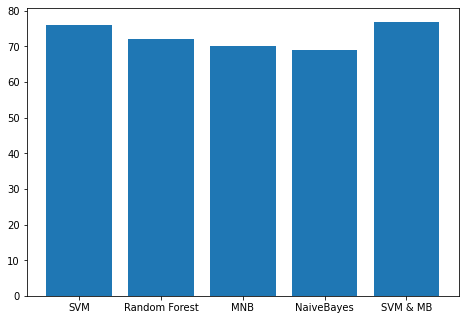

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['SVM', 'Random Forest', 'MNB', 'NaiveBayes', 'SVM & MB']
students = [76,72,70,69 ,77]
ax.bar(langs,students)
plt.show()